# Chapter 1: Vectors（ベクトル）

このノートブックは [Nature of Code](https://natureofcode.com/vectors/) の第1章をJuliaで実装したものです。

## 概要

この章では、物理シミュレーションの基礎となるベクトルについて学びます。

### 主要な概念

1. **ベクトルとは** - 大きさと方向を持つ量
2. **ベクトル演算** - 加算、減算、乗算、除算
3. **正規化** - 単位ベクトルへの変換
4. **速度と加速度** - 運動のベクトル表現

In [1]:
using Plots
using LinearAlgebra
using Random

## 1.1 ベクトルの基本

ベクトルは大きさ（magnitude）と方向（direction）を持つ量です。
2Dでは `[x, y]`、3Dでは `[x, y, z]` として表現します。

In [2]:
# ベクトルの作成
v1 = [3.0, 4.0]
v2 = [1.0, 2.0]

println("v1 = $v1")
println("v2 = $v2")
println("v1の大きさ = $(norm(v1))")
println("v2の大きさ = $(norm(v2))")

v1 = [3.0, 4.0]


v2 = [1.0, 2.0]
v1の大きさ = 5.0
v2の大きさ = 2.23606797749979


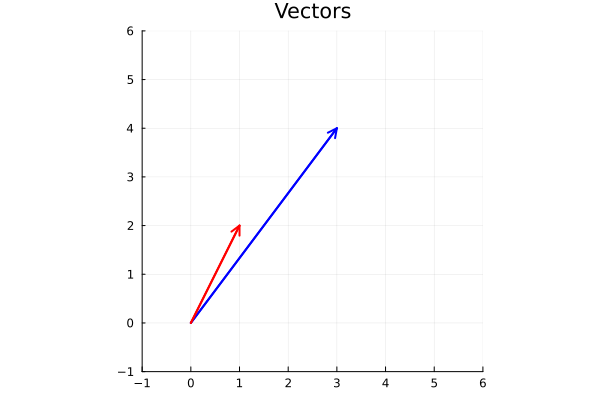

In [3]:
# ベクトルの可視化
function plot_vector(v; origin=[0.0, 0.0], color=:blue, label="")
    quiver!([origin[1]], [origin[2]], quiver=([v[1]], [v[2]]), 
            color=color, linewidth=2, label=label)
end

p = plot(xlims=(-1, 6), ylims=(-1, 6), aspect_ratio=:equal, legend=:topleft)
plot_vector(v1, color=:blue, label="v1")
plot_vector(v2, color=:red, label="v2")
title!("Vectors")
p

## 1.2 ベクトルの加算

ベクトルの加算は、各成分を足し合わせます。
幾何学的には、一方のベクトルの終点から他方のベクトルを描くことに相当します。

v1 + v2 = [4.0, 6.0]


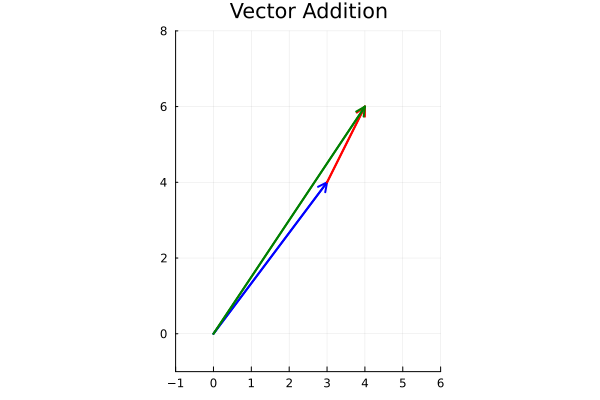

In [4]:
# ベクトルの加算
v_sum = v1 + v2
println("v1 + v2 = $v_sum")

p = plot(xlims=(-1, 6), ylims=(-1, 8), aspect_ratio=:equal, legend=:topleft)
plot_vector(v1, color=:blue, label="v1")
plot_vector(v2, origin=v1, color=:red, label="v2")
plot_vector(v_sum, color=:green, label="v1 + v2")
title!("Vector Addition")
p

## 1.3 ベクトルの減算

ベクトルの減算は、一方の点から他方の点への方向ベクトルを求めるのに使います。

v1 - v2 = [2.0, 2.0]


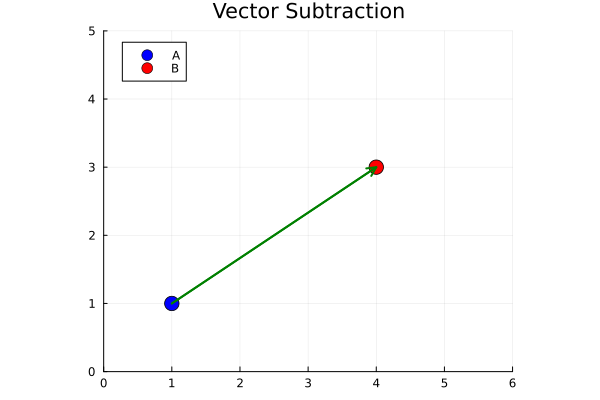

In [5]:
# ベクトルの減算
v_diff = v1 - v2
println("v1 - v2 = $v_diff")

# 2点間のベクトル
point_a = [1.0, 1.0]
point_b = [4.0, 3.0]
direction = point_b - point_a

p = plot(xlims=(0, 6), ylims=(0, 5), aspect_ratio=:equal, legend=:topleft)
scatter!([point_a[1]], [point_a[2]], markersize=8, color=:blue, label="A")
scatter!([point_b[1]], [point_b[2]], markersize=8, color=:red, label="B")
plot_vector(direction, origin=point_a, color=:green, label="B - A")
title!("Vector Subtraction")
p

## 1.4 スカラー乗算と除算

ベクトルにスカラー（数値）を掛けると、大きさが変化します。
方向は同じままです（負の数を掛けると逆向き）。

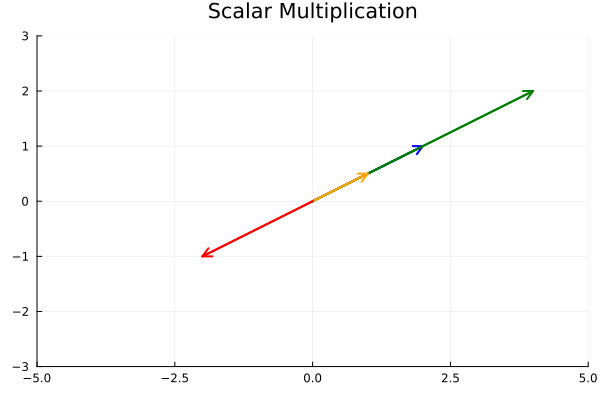

In [6]:
v = [2.0, 1.0]

p = plot(xlims=(-5, 5), ylims=(-3, 3), aspect_ratio=:equal, legend=:topleft)
plot_vector(v, color=:blue, label="v")
plot_vector(v * 2, color=:green, label="v × 2")
plot_vector(v * 0.5, color=:orange, label="v × 0.5")
plot_vector(v * -1, color=:red, label="v × -1")
title!("Scalar Multiplication")
p

## 1.5 大きさ（Magnitude）

ベクトルの大きさはピタゴラスの定理で計算します：

$$|\vec{v}| = \sqrt{x^2 + y^2}$$

In [7]:
v = [3.0, 4.0]

# 手動計算
mag_manual = sqrt(v[1]^2 + v[2]^2)

# LinearAlgebraのnorm関数
mag_norm = norm(v)

println("v = $v")
println("大きさ（手動計算）= $mag_manual")
println("大きさ（norm関数）= $mag_norm")

v = [3.0, 4.0]
大きさ（手動計算）= 5.0
大きさ（norm関数）= 5.0


## 1.6 正規化（Normalization）

正規化とは、ベクトルの大きさを1にすることです。
方向は保持されます。

$$\hat{v} = \frac{\vec{v}}{|\vec{v}|}$$

元のベクトル: [3.0, 4.0], 大きさ: 5.0


正規化後: [0.6000000000000001, 0.8], 大きさ: 1.0


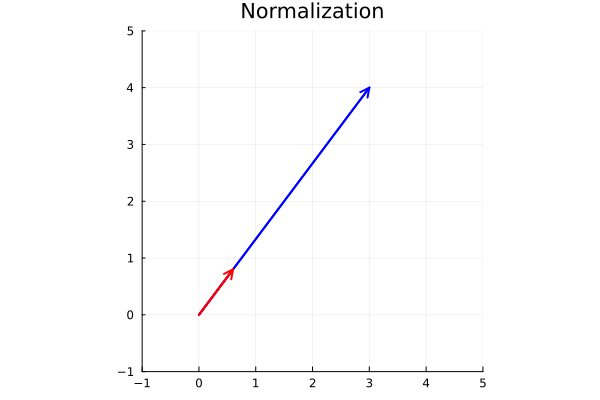

In [8]:
v = [3.0, 4.0]

# 正規化
v_normalized = normalize(v)

println("元のベクトル: $v, 大きさ: $(norm(v))")
println("正規化後: $v_normalized, 大きさ: $(norm(v_normalized))")

p = plot(xlims=(-1, 5), ylims=(-1, 5), aspect_ratio=:equal, legend=:topleft)
plot_vector(v, color=:blue, label="v (mag=$(norm(v)))")
plot_vector(v_normalized, color=:red, label="normalized (mag=1)")
title!("Normalization")
p

## 1.7 ヘルパー関数

ベクトル操作のための便利な関数を定義します。

In [9]:
# 大きさを設定
function setmag(v, mag)
    n = norm(v)
    return n > 0 ? v * (mag / n) : v
end

# 大きさを制限
function limit(v, max_mag)
    mag = norm(v)
    return mag > max_mag ? setmag(v, max_mag) : v
end

# 角度を取得（ラジアン）
heading(v) = atan(v[2], v[1])

# 角度からベクトルを作成
from_angle(angle) = [cos(angle), sin(angle)]

# ランダムな単位ベクトル
random2d() = from_angle(rand() * 2π)

# テスト
v = [3.0, 4.0]
println("setmag(v, 10) = $(setmag(v, 10))")
println("limit(v, 3) = $(limit(v, 3))")
println("heading(v) = $(rad2deg(heading(v)))°")
println("random2d() = $(random2d())")

setmag(v, 10) = [6.0, 8.0]
limit(v, 3) = [1.7999999999999998, 2.4]
heading(v) = 53.13010235415598°
random2d() = [-0.7448464042136528, -0.6672359658546532]


## 1.8 バウンドするボール

ベクトルを使って位置と速度を管理する基本的な例です。

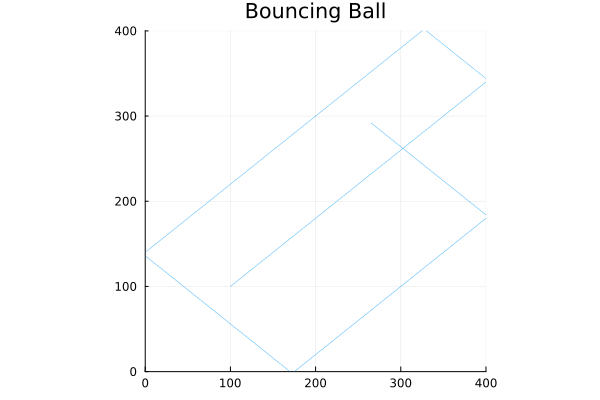

In [10]:
# バウンドするボールのシミュレーション
function simulate_bouncing_ball(steps::Int; width=400, height=400)
    position = [width/4, height/4]
    velocity = [2.5, 2.0]
    
    positions = [copy(position)]
    
    for _ in 1:steps
        # 位置を更新
        position .+= velocity
        
        # 壁でバウンド
        if position[1] > width || position[1] < 0
            velocity[1] *= -1
        end
        if position[2] > height || position[2] < 0
            velocity[2] *= -1
        end
        
        push!(positions, copy(position))
    end
    
    return positions
end

positions = simulate_bouncing_ball(500)
xs = [p[1] for p in positions]
ys = [p[2] for p in positions]

plot(xs, ys, legend=false, linewidth=0.5, alpha=0.7,
     xlims=(0, 400), ylims=(0, 400), aspect_ratio=:equal,
     title="Bouncing Ball")

## 1.9 Moverクラス（速度と加速度）

物体の動きをクラスでカプセル化します。

運動の基本アルゴリズム：
```
velocity = velocity + acceleration
position = position + velocity
```

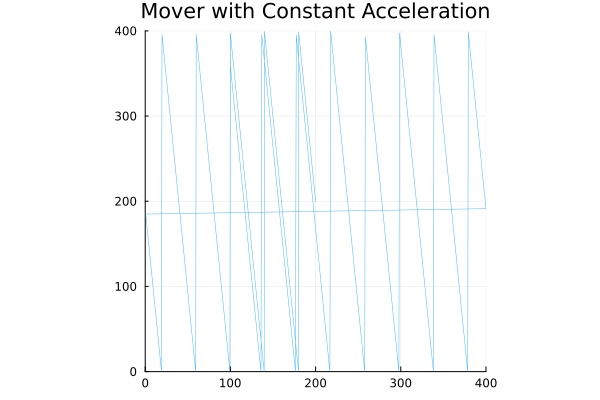

In [11]:
mutable struct Mover
    position::Vector{Float64}
    velocity::Vector{Float64}
    acceleration::Vector{Float64}
    topspeed::Float64
end

function Mover(x::Float64, y::Float64)
    Mover([x, y], [0.0, 0.0], [-0.001, 0.01], 10.0)
end

function update!(m::Mover)
    m.velocity .+= m.acceleration
    m.velocity = limit(m.velocity, m.topspeed)
    m.position .+= m.velocity
end

function check_edges!(m::Mover, width, height)
    if m.position[1] > width
        m.position[1] = 0
    elseif m.position[1] < 0
        m.position[1] = width
    end
    
    if m.position[2] > height
        m.position[2] = 0
    elseif m.position[2] < 0
        m.position[2] = height
    end
end

# シミュレーション
function simulate_mover(steps::Int; width=400, height=400)
    mover = Mover(width/2, height/2)
    positions = [copy(mover.position)]
    
    for _ in 1:steps
        update!(mover)
        check_edges!(mover, width, height)
        push!(positions, copy(mover.position))
    end
    
    return positions
end

positions = simulate_mover(1000)
xs = [p[1] for p in positions]
ys = [p[2] for p in positions]

plot(xs, ys, legend=false, linewidth=0.5, alpha=0.7,
     xlims=(0, 400), ylims=(0, 400), aspect_ratio=:equal,
     title="Mover with Constant Acceleration")

## 1.10 ランダムな加速度

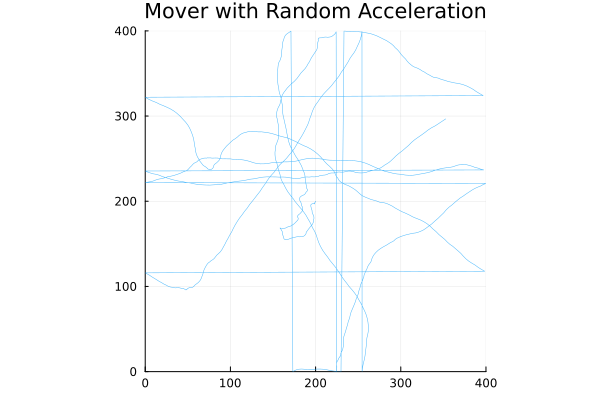

In [12]:
# ランダムな加速度を持つMover
function simulate_random_mover(steps::Int; width=400, height=400)
    position = [width/2, height/2]
    velocity = [0.0, 0.0]
    topspeed = 5.0
    
    positions = [copy(position)]
    
    for _ in 1:steps
        # ランダムな加速度
        acceleration = random2d() * 0.5
        
        velocity .+= acceleration
        velocity = limit(velocity, topspeed)
        position .+= velocity
        
        # エッジ処理
        if position[1] > width; position[1] = 0 end
        if position[1] < 0; position[1] = width end
        if position[2] > height; position[2] = 0 end
        if position[2] < 0; position[2] = height end
        
        push!(positions, copy(position))
    end
    
    return positions
end

positions = simulate_random_mover(1000)
xs = [p[1] for p in positions]
ys = [p[2] for p in positions]

plot(xs, ys, legend=false, linewidth=0.5, alpha=0.7,
     xlims=(0, 400), ylims=(0, 400), aspect_ratio=:equal,
     title="Mover with Random Acceleration")

## 1.11 マウス（ターゲット）に向かって加速

ベクトルの減算と正規化を使って、ターゲットに向かって加速する物体を作ります。

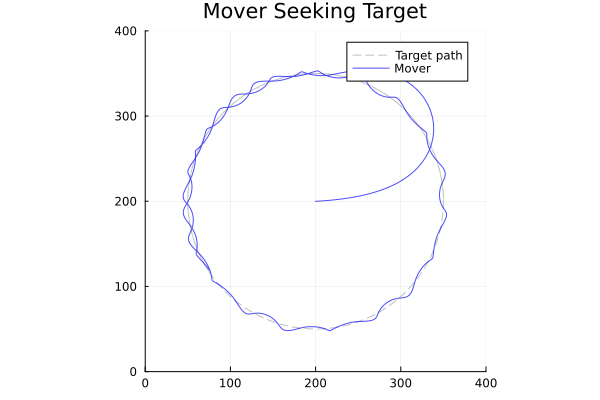

In [13]:
# ターゲットに向かって加速するMover
function simulate_seeking_mover(steps::Int; width=400, height=400)
    position = [width/2, height/2]
    velocity = [0.0, 0.0]
    topspeed = 5.0
    
    # ターゲットは円軌道上を動く
    positions = [copy(position)]
    
    for t in 1:steps
        # ターゲットの位置（円軌道）
        target = [width/2 + 150*cos(t*0.02), height/2 + 150*sin(t*0.02)]
        
        # ターゲットに向かう方向を計算
        direction = target - position
        acceleration = setmag(direction, 0.5)
        
        velocity .+= acceleration
        velocity = limit(velocity, topspeed)
        position .+= velocity
        
        push!(positions, copy(position))
    end
    
    return positions
end

positions = simulate_seeking_mover(500)
xs = [p[1] for p in positions]
ys = [p[2] for p in positions]

# ターゲットの軌道も描画
target_xs = [200 + 150*cos(t*0.02) for t in 1:500]
target_ys = [200 + 150*sin(t*0.02) for t in 1:500]

plot(target_xs, target_ys, color=:gray, linestyle=:dash, label="Target path", alpha=0.5)
plot!(xs, ys, legend=:topright, linewidth=1, alpha=0.7, color=:blue, label="Mover",
      xlims=(0, 400), ylims=(0, 400), aspect_ratio=:equal,
      title="Mover Seeking Target")

## 1.12 複数の物体

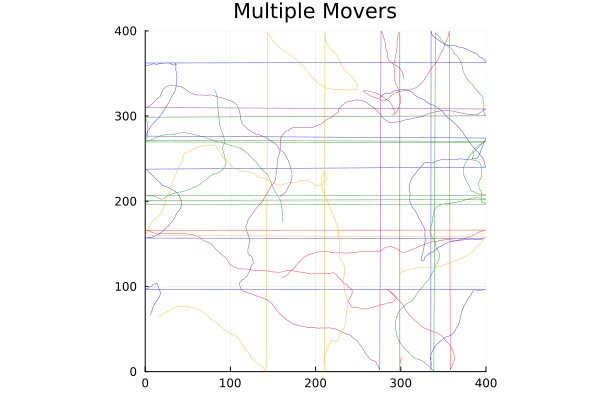

In [14]:
# 複数のMoverをシミュレート
mutable struct SimpleMover
    position::Vector{Float64}
    velocity::Vector{Float64}
end

function simulate_multiple_movers(n_movers::Int, steps::Int; width=400, height=400)
    movers = [SimpleMover([rand()*width, rand()*height], [0.0, 0.0]) for _ in 1:n_movers]
    
    all_positions = [Vector{Vector{Float64}}() for _ in 1:n_movers]
    
    for _ in 1:steps
        for (i, m) in enumerate(movers)
            # ランダムな加速度
            acceleration = random2d() * 0.5
            
            m.velocity .+= acceleration
            m.velocity = limit(m.velocity, 3.0)
            m.position .+= m.velocity
            
            # エッジ処理
            if m.position[1] > width; m.position[1] = 0 end
            if m.position[1] < 0; m.position[1] = width end
            if m.position[2] > height; m.position[2] = 0 end
            if m.position[2] < 0; m.position[2] = height end
            
            push!(all_positions[i], copy(m.position))
        end
    end
    
    return all_positions
end

all_positions = simulate_multiple_movers(5, 500)

p = plot(xlims=(0, 400), ylims=(0, 400), aspect_ratio=:equal, legend=false)
colors = [:red, :blue, :green, :orange, :purple]

for (i, positions) in enumerate(all_positions)
    xs = [pos[1] for pos in positions]
    ys = [pos[2] for pos in positions]
    plot!(xs, ys, color=colors[i], linewidth=0.5, alpha=0.7)
end

title!("Multiple Movers")
p

## まとめ

### ベクトル演算

| 演算 | Julia | 説明 |
|------|-------|------|
| 加算 | `v1 + v2` | 各成分を加算 |
| 減算 | `v1 - v2` | 各成分を減算 |
| スカラー乗算 | `v * n` | 大きさをn倍 |
| 大きさ | `norm(v)` | ベクトルの長さ |
| 正規化 | `normalize(v)` | 単位ベクトル化 |

### カスタム関数

| 関数 | 説明 |
|------|------|
| `setmag(v, m)` | 大きさをmに設定 |
| `limit(v, max)` | 大きさを最大maxに制限 |
| `heading(v)` | 角度を取得 |
| `from_angle(θ)` | 角度から単位ベクトルを作成 |

### 運動の基本アルゴリズム

```julia
velocity += acceleration
position += velocity
```